In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

100% 66.0M/66.0M [00:00<00:00, 93.8MB/s]



In [5]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [6]:
data = pd.read_csv('creditcard.csv')

In [7]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
#data.isnull()
#data.isnull().sum()
#data.isnull().sum().any()
data.isnull().sum().max()

0

In [11]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Data Balance Check

print( 'Fraud Percentage: {}'.format(round( (df['Class'].value_counts()[1]/len(df))*100, 2) ) )

print( 'Non Fraud Percentage: {}'.format(round( (df['Class'].value_counts()[0]/len(df))*100, 2) ) ) 


In [12]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Note: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud & 1: Fraud)')

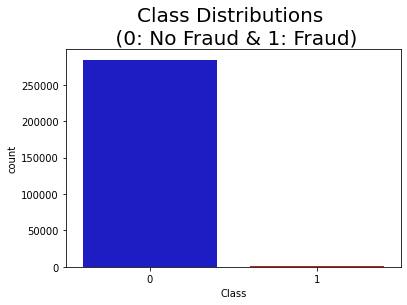

In [13]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud & 1: Fraud)', fontsize=20)

Distributions: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future

## Now Splitting The data into target and other input

In [14]:
y = data['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [15]:
data.drop(columns='Class', inplace=True)

In [16]:
print(data.shape)
data

(284807, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


Splitting dataset into Train and Test set

In [17]:
X_train = data[:142400]
X_test = data[142400:227840]
X_val = data[227840:]

In [18]:
Y_train = y[:142400]
Y_test = y[142400:227840]
Y_val = y[227840:]

In [19]:
print(X_train.shape)
print(Y_train.shape)

(142400, 30)
(142400,)


In [25]:
X_train.iloc[:,29:].values.mean()

90.68879030898876

In [26]:
X_train.iloc[:,29:].values.std()

246.46099870046643

### **Normalization**

In [27]:
mean =X_train.iloc[:,29:].values.mean()
X_train['Amount'] -= mean

std = X_train.iloc[:,29:].values.std()
X_train['Amount'] /= std

X_test['Amount'] -= mean
X_test['Amount'] /= std


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [30]:
print(X_train.shape)
print(Y_train.shape)

(142400, 30)
(142400,)


In [33]:
X_train.iloc[:,0:1]

,Time
0,0.0
1,0.0
2,1.0
3,1.0
4,2.0
...,...
142395,84687.0
142396,84687.0
142397,84688.0
142398,84689.0


In [34]:
mean =X_train.iloc[:,0:1].values.mean()
X_train['Time'] -= mean

std = X_train.iloc[:,29:].values.std()
X_train['Time'] /= std

X_test['Time'] -= mean
X_test['Time'] /= std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [35]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-52402.242205,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.239110
1,-52402.242205,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.357050
2,-52401.242205,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.168425
3,-52401.242205,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.133129
4,-52400.242205,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.083984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142395,32284.757795,-0.720308,-4.195335,0.411812,-0.311117,-2.563613,1.292510,-0.334193,0.365881,2.884359,-1.781717,0.304302,1.450280,-0.844647,-0.620855,-0.921163,-0.943548,0.566416,0.491140,0.957506,1.767588,0.698688,0.445542,-1.027680,-0.147869,0.131970,0.173358,-0.070663,0.176413,3.520805
142396,32284.757795,-0.537152,1.072182,1.316695,1.123155,0.185313,0.105776,0.790742,-0.081411,-0.312631,-0.170547,-0.548610,0.518188,0.498129,-0.173642,-0.047593,-1.138757,0.448663,-0.805301,0.438916,-0.079131,0.056192,0.379248,-0.115989,0.117478,-0.280746,-0.345392,-0.047852,0.152489,-0.237031
142397,32285.757795,-1.091024,0.680341,-0.030040,-1.913987,-0.461060,-0.387802,1.195571,0.276549,0.374670,-1.502426,1.247522,1.821365,0.524183,0.482989,-0.636140,-0.918655,-0.054105,-0.205237,0.068689,-0.157917,0.213745,0.873980,0.087773,0.062275,-0.080598,-0.813116,0.277535,0.114179,0.281307
142398,32286.757795,-0.958424,0.158677,0.355967,-1.285726,2.624957,3.568378,0.253679,0.967816,-0.350978,-0.907931,-0.665462,-0.106806,-0.324360,-0.024121,-0.496300,0.151528,-0.623307,-0.110405,0.225564,0.228454,-0.177771,-0.769466,-0.134086,1.014527,0.637807,0.220354,-0.031313,0.057888,-0.093641


In [36]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(142400, 30)
(142400,)
(85440, 30)
(85440,)


In [37]:
X_train.shape[1]

30

In [39]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(10, activation = 'relu', input_shape = (30,)))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(6, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
history=model.fit(X_train, Y_train,validation_data= (X_val, Y_val),epochs=100, batch_size=256, verbose=1)

Epoch 1/100
557/557 [==============================] - 2s 2ms/step - loss: 1.6683 - accuracy: 0.9961 - val_loss: 1.2253 - val_accuracy: 0.9887
Epoch 2/100
557/557 [==============================] - 1s 2ms/step - loss: 0.0453 - accuracy: 0.9978 - val_loss: 0.5753 - val_accuracy: 0.9966
Epoch 3/100
557/557 [==============================] - 1s 2ms/step - loss: 0.3161 - accuracy: 0.9978 - val_loss: 9.4257 - val_accuracy: 0.9987
Epoch 4/100
557/557 [==============================] - 1s 2ms/step - loss: 0.2132 - accuracy: 0.9980 - val_loss: 6.7672 - val_accuracy: 0.9987
Epoch 5/100
557/557 [==============================] - 1s 2ms/step - loss: 0.1500 - accuracy: 0.9982 - val_loss: 0.9533 - val_accuracy: 0.9947
Epoch 6/100
557/557 [==============================] - 1s 2ms/step - loss: 0.1084 - accuracy: 0.9981 - val_loss: 0.7684 - val_accuracy: 0.9955
Epoch 7/100
557/557 [==============================] - 1s 2ms/step - loss: 0.3826 - accuracy: 0.9975 - val_loss: 0.8004 - val_accuracy: 0.9980

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

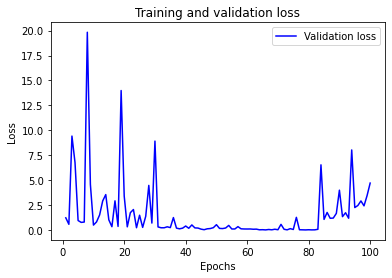

In [46]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
#plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Now For Experiment I am checking the model with 'tanh' activation Function  

In [48]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(10, activation = 'tanh', input_shape = (30,)))
model.add(layers.Dense(8, activation = 'tanh'))
model.add(layers.Dense(6, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
history=model.fit(X_train, Y_train,validation_data= (X_val, Y_val),epochs=100, batch_size=256, verbose=1)

Epoch 1/100
557/557 [==============================] - 2s 2ms/step - loss: 0.3425 - accuracy: 0.8963 - val_loss: 0.0170 - val_accuracy: 0.9987
Epoch 2/100
557/557 [==============================] - 1s 2ms/step - loss: 0.0173 - accuracy: 0.9982 - val_loss: 0.0111 - val_accuracy: 0.9987
Epoch 3/100
557/557 [==============================] - 1s 2ms/step - loss: 0.0138 - accuracy: 0.9982 - val_loss: 0.0104 - val_accuracy: 0.9987
Epoch 4/100
557/557 [==============================] - 1s 2ms/step - loss: 0.0131 - accuracy: 0.9982 - val_loss: 0.0102 - val_accuracy: 0.9987
Epoch 5/100
557/557 [==============================] - 1s 2ms/step - loss: 0.0150 - accuracy: 0.9979 - val_loss: 0.0101 - val_accuracy: 0.9987
Epoch 6/100
557/557 [==============================] - 1s 2ms/step - loss: 0.0129 - accuracy: 0.9982 - val_loss: 0.0101 - val_accuracy: 0.9987
Epoch 7/100
557/557 [==============================] - 1s 2ms/step - loss: 0.0143 - accuracy: 0.9980 - val_loss: 0.0101 - val_accuracy: 0.9987

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

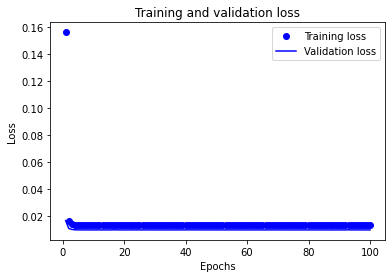

In [51]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Again I am going to train model with less epochs and by lessing the number of layers**

In [52]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(10, activation = 'relu', input_shape = (30,)))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [53]:
history=model.fit(X_train, Y_train,validation_data= (X_val, Y_val),epochs=40, batch_size=512, verbose=1)

Epoch 1/40
279/279 [==============================] - 1s 2ms/step - loss: 3.1416 - accuracy: 0.9974 - val_loss: 8.0839 - val_accuracy: 0.9987
Epoch 2/40
279/279 [==============================] - 1s 2ms/step - loss: 0.2964 - accuracy: 0.9982 - val_loss: 1.0270 - val_accuracy: 0.9987
Epoch 3/40
279/279 [==============================] - 1s 2ms/step - loss: 0.0546 - accuracy: 0.9980 - val_loss: 0.3653 - val_accuracy: 0.9987
Epoch 4/40
279/279 [==============================] - 1s 2ms/step - loss: 0.0379 - accuracy: 0.9980 - val_loss: 0.1586 - val_accuracy: 0.9987
Epoch 5/40
279/279 [==============================] - 1s 2ms/step - loss: 0.0443 - accuracy: 0.9982 - val_loss: 0.4005 - val_accuracy: 0.9987
Epoch 6/40
279/279 [==============================] - 1s 2ms/step - loss: 0.0266 - accuracy: 0.9979 - val_loss: 0.1377 - val_accuracy: 0.9987
Epoch 7/40
279/279 [==============================] - 1s 2ms/step - loss: 0.0392 - accuracy: 0.9981 - val_loss: 0.1290 - val_accuracy: 0.9987
Epoch 

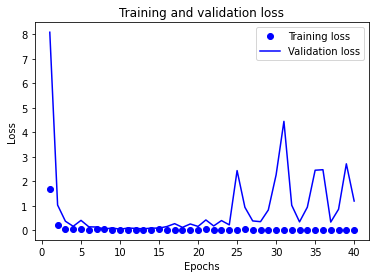

In [54]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Retraining the model with Regularizer Included**

In [55]:
from keras import models
from keras import layers
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(10, activation = 'relu', kernel_regularizer= regularizers.l2(0.001), input_shape = (30,)))
model.add(layers.Dense(8, activation = 'relu', kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [56]:
history=model.fit(X_train, Y_train,validation_data= (X_val, Y_val),epochs=40, batch_size=512, verbose=1)

Epoch 1/40
279/279 [==============================] - 1s 3ms/step - loss: 554.2802 - accuracy: 0.5982 - val_loss: 5.0117 - val_accuracy: 0.9987
Epoch 2/40
279/279 [==============================] - 1s 2ms/step - loss: 1.0352 - accuracy: 0.9981 - val_loss: 4.4276 - val_accuracy: 0.9987
Epoch 3/40
279/279 [==============================] - 1s 2ms/step - loss: 0.9722 - accuracy: 0.9978 - val_loss: 3.6153 - val_accuracy: 0.9987
Epoch 4/40
279/279 [==============================] - 1s 2ms/step - loss: 0.6198 - accuracy: 0.9978 - val_loss: 2.6408 - val_accuracy: 0.9987
Epoch 5/40
279/279 [==============================] - 1s 2ms/step - loss: 0.2189 - accuracy: 0.9978 - val_loss: 1.6014 - val_accuracy: 0.9987
Epoch 6/40
279/279 [==============================] - 1s 2ms/step - loss: 0.1028 - accuracy: 0.9982 - val_loss: 0.4882 - val_accuracy: 0.9987
Epoch 7/40
279/279 [==============================] - 1s 2ms/step - loss: 0.0519 - accuracy: 0.9982 - val_loss: 0.2387 - val_accuracy: 0.9987
Epoc

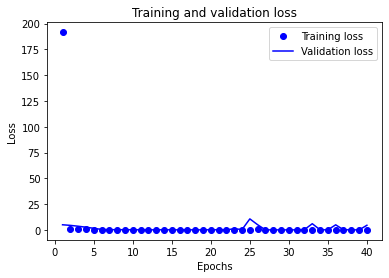

In [62]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

2670/2670 [==============================] - 4s 1ms/step - loss: 2.2460 - accuracy: 0.9983


In [64]:
prediction = model.predict(X_test)

In [65]:
prediction[0]

array([0.], dtype=float32)

In [66]:
prediction[0].shape

(1,)

In [68]:
np.argmax(prediction[0])

0